In [0]:
from keras.datasets import fashion_mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import time
import itertools 

# 1.Import Dataset

In [3]:
#import the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


# 2.Data Preprocessing

## 2.1StandardScaler

In [0]:
#StandardScaler
def data_flatten(X_dataset):
  X_num, nx, ny = X_dataset.shape
  X_dataset = X_dataset.astype('float64').reshape((X_num,nx*ny))
  return X_dataset
def std_scaler(X_dataset):
    std_scaler = preprocessing.StandardScaler()
    std_scaler.fit(X_dataset)
    return std_scaler
X_train = data_flatten(X_train)
X_test = data_flatten(X_test)
scaler = std_scaler(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 2.2PCA

In [0]:
#PCA   
pca = PCA(n_components=256)#set the dimension which contains 95% information
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_
X_test = pca.transform(X_test)

Text(0, 0.5, 'Information retention')

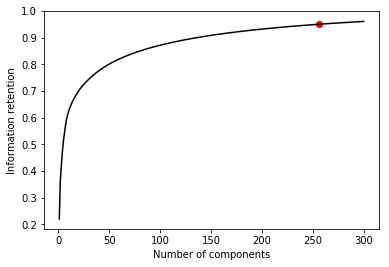

In [0]:
plt.plot([i for i in range(1,301)],res[:300],color = 'black')
plt.scatter(256,res[255], color='r')
plt.scatter(256,res[255], color='r',marker='o',edgecolors='r',s=30)
plt.xlabel('Number of components')
plt.ylabel('Information retention')

# 3.Tuning Parameter

## 3.1 Tuning n-estimator

In [0]:
param_grid = {
    'n_estimators': np.linspace(10,200,20,endpoint=True,dtype=np.int64)
}
rfc = RandomForestClassifier(max_features='sqrt',bootstrap = True) 

In [0]:
grid = GridSearchCV(rfc, param_grid=param_grid, cv=2)
grid.fit(X_train[:20000], y_train[:20000])
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))
for i in range(len(grid.cv_results_['params'])):
  print(str(grid.cv_results_['params'][i])+" acc:"+str(grid.cv_results_['mean_test_score'][i])+" time:"+str(grid.cv_results_['mean_fit_time'][i]))

The best parameters are {'n_estimators': 200} with a score of 0.84
{'n_estimators': 10} acc:0.77365 time:1.941413402557373
{'n_estimators': 20} acc:0.80755 time:3.811811685562134
{'n_estimators': 30} acc:0.81975 time:5.59393036365509
{'n_estimators': 40} acc:0.8266 time:7.443226218223572
{'n_estimators': 50} acc:0.8274 time:9.140252709388733
{'n_estimators': 60} acc:0.83115 time:11.01061487197876
{'n_estimators': 70} acc:0.8353 time:12.759292960166931
{'n_estimators': 80} acc:0.83555 time:14.735636115074158
{'n_estimators': 90} acc:0.83565 time:16.467103242874146
{'n_estimators': 100} acc:0.83485 time:18.428159594535828
{'n_estimators': 110} acc:0.8355 time:20.30924153327942
{'n_estimators': 120} acc:0.839 time:22.23369061946869
{'n_estimators': 130} acc:0.83745 time:23.964033246040344
{'n_estimators': 140} acc:0.83645 time:25.81723952293396
{'n_estimators': 150} acc:0.83835 time:27.78175914287567
{'n_estimators': 160} acc:0.83955 time:29.484796047210693
{'n_estimators': 170} acc:0.838

Text(0.05, 0.3, 'Time(seconds)')

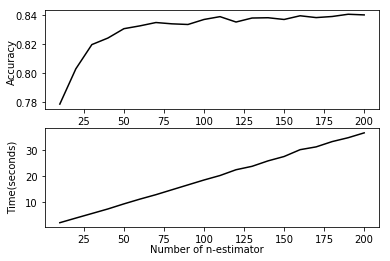

In [0]:
y_acc = grid.cv_results_['mean_test_score']
x = np.linspace(10,200,20,endpoint=True,dtype=np.int64)
y_time = grid.cv_results_['mean_fit_time']
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(x,y_acc,color = 'black')
ax2.plot(x,y_time,color = 'black')
fig.text(0.5, 0.05, 'Number of n-estimator', ha='center', va='center')
fig.text(0.05, 0.7, 'Accuracy', ha='center', va='center', rotation='vertical')
fig.text(0.05, 0.3, 'Time(seconds)', ha='center', va='center', rotation='vertical')

## 3.2 Tuning Max Depth

In [0]:
param_grid = {
    'max_depth': np.linspace(10,100,10,endpoint=True,dtype=np.int64)
}
rfc = RandomForestClassifier(max_features='sqrt',n_estimators=125) 

In [26]:
grid = GridSearchCV(rfc, param_grid=param_grid, cv=2)
grid.fit(X_train[:20000], y_train[:20000])
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))
for i in range(len(grid.cv_results_['params'])):
  print(str(grid.cv_results_['params'][i])+" acc:"+str(grid.cv_results_['mean_test_score'][i])+" time:"+str(grid.cv_results_['mean_fit_time'][i]))

The best parameters are {'max_depth': 40} with a score of 0.84
{'max_depth': 10} acc:0.81355 time:17.212251901626587
{'max_depth': 20} acc:0.83765 time:22.671388864517212
{'max_depth': 30} acc:0.83535 time:22.9012553691864
{'max_depth': 40} acc:0.8383 time:22.773075819015503
{'max_depth': 50} acc:0.8373 time:22.838473200798035
{'max_depth': 60} acc:0.8375 time:23.103638529777527
{'max_depth': 70} acc:0.8375 time:23.079716086387634
{'max_depth': 80} acc:0.83765 time:22.975979447364807
{'max_depth': 90} acc:0.8382 time:23.06290030479431
{'max_depth': 100} acc:0.83675 time:22.95459246635437


Text(0.01, 0.3, 'Std.')

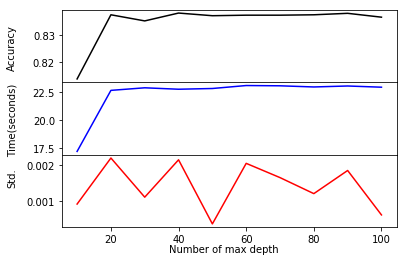

In [27]:
y_acc = grid.cv_results_['mean_test_score']
x = np.linspace(10,100,10,endpoint=True,dtype=np.int64)
y_time = grid.cv_results_['mean_fit_time']
y_std = grid.cv_results_['std_test_score']
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.plot(x,y_acc,color = 'black')
ax2.plot(x,y_time,color = 'blue')
ax3.plot(x,y_std,color = 'red')
plt.subplots_adjust(wspace =0, hspace =0)
fig.text(0.5, 0.05, 'Number of max depth', ha='center', va='center')
fig.text(0.01, 0.75, 'Accuracy', ha='center', va='center', rotation='vertical')
fig.text(0.01, 0.5, 'Time(seconds)', ha='center', va='center', rotation='vertical')
fig.text(0.01, 0.3, 'Std.', ha='center', va='center', rotation='vertical')

## 3.3 Tuning Max Features

In [0]:
param_grid = {
    'max_features': ['sqrt','log2']
}
rfc = RandomForestClassifier(max_features='sqrt',n_estimators=125,max_depth=50) 

In [36]:
grid = GridSearchCV(rfc, param_grid=param_grid, cv=2)
grid.fit(X_train[:20000], y_train[:20000])
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))
for i in range(len(grid.cv_results_['params'])):
  print(str(grid.cv_results_['params'][i])+" acc:"+str(grid.cv_results_['mean_test_score'][i])+" time:"+str(grid.cv_results_['mean_fit_time'][i]))

The best parameters are {'max_features': 'sqrt'} with a score of 0.84
{'max_features': 'sqrt'} acc:0.83755 time:23.236003756523132
{'max_features': 'log2'} acc:0.83285 time:12.917887806892395


## 3.4 10-fold Cross Validation

In [46]:
grid = GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': [125],'max_features': ['sqrt'],'max_depth':[50]}, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [47]:
grid.cv_results_

{'mean_fit_time': array([182.08995168]),
 'mean_score_time': array([0.35396967]),
 'mean_test_score': array([0.86675]),
 'param_max_depth': masked_array(data=[50],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[125],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 125}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.86666667]),
 'split1_test_score': array([0.86983333]),
 'split2_test_score': array([0.85883333]),
 'split3_test_score': array([0.86683333]),
 'split4_test_score': array([0.86833333]),
 'split5_test_score': array([0.87016667]),
 'split6_test_score': array([0.87083333]),
 'split7_test_score': array([0.86566667]),
 'split8_test_score': array([0.

# 4 Trained Model

## 4.1Prediction

In [39]:
start = time.time()
model = RandomForestClassifier(n_estimators=125,max_features='sqrt',max_depth=50)
model.fit(X_train,y_train)
end = time.time()
print("the time for training model is {} seconds.".format(str(end-start)))

the time for training model is 210.23229455947876 seconds.


In [40]:
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print("the time for predicting label is {} seconds.".format(str(end-start)))

the time for predicting label is 0.6058940887451172 seconds.


## 4.2 Evaluation

In [0]:
#get confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap='Oranges'):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  f = plt.figure()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  

<Figure size 432x288 with 0 Axes>

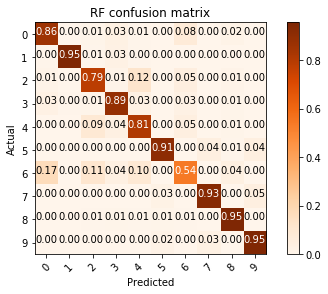

In [44]:
classes = [i for i in range(10)]
cfz_mat = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cfz_mat, classes=classes, normalize=True,
                      title='RF confusion matrix')
plt.show()

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       1.00      0.95      0.97      1000
           2       0.77      0.79      0.78      1000
           3       0.85      0.89      0.87      1000
           4       0.75      0.81      0.78      1000
           5       0.94      0.91      0.92      1000
           6       0.72      0.54      0.62      1000
           7       0.92      0.93      0.93      1000
           8       0.91      0.95      0.93      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

